In [ ]:
import matplotlib.pyplot as plt

def plot_inference_times_from_file(filepath: str):
	"""Đọc file thời gian inference (1 cột) và vẽ biểu đồ trực quan hóa."""
	times = []

	with open(filepath, 'r') as file:
		for line in file:
			try:
				times.append(float(line.strip()))
			except ValueError:
				continue  

	batches = list(range(1, len(times) + 1))
	avg_time = sum(times) / len(times)
	min_val = min(times)
	max_val = max(times)
	min_idx = times.index(min_val)
	max_idx = times.index(max_val)

	plt.figure(figsize=(12, 6))
	plt.plot(batches, times, label="Inference Time per 10 Frames", marker='o', linewidth=1.8)

	plt.scatter(min_idx + 1, min_val, color='green', s=100,
		label=f"Min: {min_val:.2f} ms/batch ({min_val/10:.2f} ms/frame)", zorder=5)
	plt.scatter(max_idx + 1, max_val, color='red', s=100,
		label=f"Max: {max_val:.2f} ms/batch ({max_val/10:.2f} ms/frame)", zorder=5)

	### Vẽ đường trung bình
	plt.axhline(avg_time, color='blue', linestyle='--', label=f"Avg: {avg_time:.2f} ms/batch ({avg_time/10:.2f} ms/frame)")

	### Tên biểu đồ 
	plt.title("Multi-Agent AOI Inference Time/Batch (1 Batch = 10 Frames)", fontsize=14)
	plt.xlabel("Batch Index", fontsize=12)
	plt.xticks(
		ticks=range(0, len(batches), 10),  # mỗi 5 tick 1 mốc, tùy chỉnh theo độ dài
		fontsize=9,
		rotation=0   # nghiêng nhẹ cho dễ đọc
	)
	plt.ylabel("Time (ms)", fontsize=12)
	plt.grid(True, linestyle='--', alpha=0.5)
	plt.legend()
	plt.tight_layout()
	plt.show()



FILE_PATH = "/home/chwenjun225/projects/DeepEngine/evals/inference_times.csv"
plot_inference_times_from_file(FILE_PATH) 

# Cải thiện tốc độ

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Cập nhật lại dữ liệu tốc độ suy luận
df = pd.DataFrame({
    "Days": ["0", "5", "10"],
    "Min":  [335, 280, 220],
    "Max":  [700, 600, 500],
    "Avg":  [491, 440, 360]
})

# Tạo nhãn legend có chứa số liệu
legend_labels = [
    f"Min (March 27: {df['Min'][0]} ms, April 03: {df['Min'][1]} ms, April 10: {df['Min'][2]} ms)",
    f"Max (March 27: {df['Max'][0]} ms, April 03: {df['Max'][1]} ms, April 10: {df['Max'][2]} ms)",
    f"Avg (March 27: {df['Avg'][0]} ms, April 03: {df['Avg'][1]} ms, April 10: {df['Avg'][2]} ms)"
]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
min_line, = plt.plot(df["Date"], df["Min"], marker='o')
max_line, = plt.plot(df["Date"], df["Max"], marker='o')
avg_line, = plt.plot(df["Date"], df["Avg"], marker='o')

plt.title("The progress of improvement in accuracy Speed", fontdict={"font": "Times New Roman"})
plt.xlabel("Date")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend([min_line, max_line, avg_line], legend_labels, loc="upper right")
plt.tight_layout()

plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

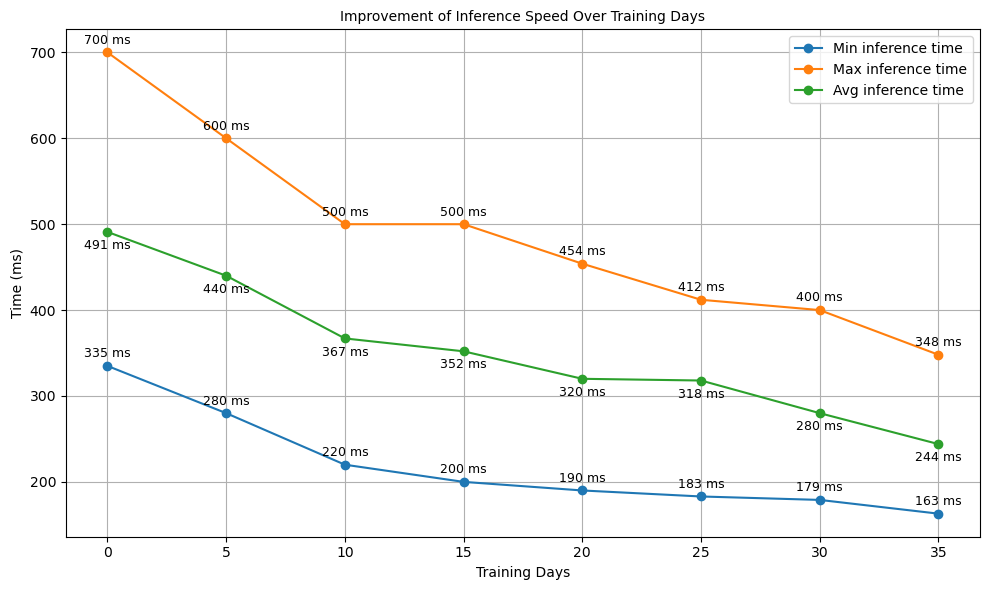

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Cập nhật lại dữ liệu tốc độ suy luận
df = pd.DataFrame({
    "Days": ["0", "5", "10", "15", "20", "25", "30", "35"],
    "Min":  [335, 280, 220, 200, 190, 183, 179, 163],
    "Max":  [700, 600, 500, 500, 454, 412, 400, 348],
    "Avg":  [491, 440, 367, 352, 320, 318, 280, 244], 
})

# Thiết lập font global
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df["Days"], df["Min"], marker='o', label="Min inference time")
plt.plot(df["Days"], df["Max"], marker='o', label="Max inference time")
plt.plot(df["Days"], df["Avg"], marker='o', label="Avg inference time")

# Thêm nhãn số liệu ngay tại từng điểm
for _, row in df.iterrows():
    plt.text(row["Days"], row["Min"] + 10, f"{row['Min']} ms", ha='center', fontsize=9)
    plt.text(row["Days"], row["Max"] + 10, f"{row['Max']} ms", ha='center', fontsize=9)
    plt.text(row["Days"], row["Avg"] - 20, f"{row['Avg']} ms", ha='center', fontsize=9)

plt.title("Improvement of Inference Speed Over Training Days", fontdict={"font": "Times New Roman"})
plt.xlabel("Training Days")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


# Độ chính xác

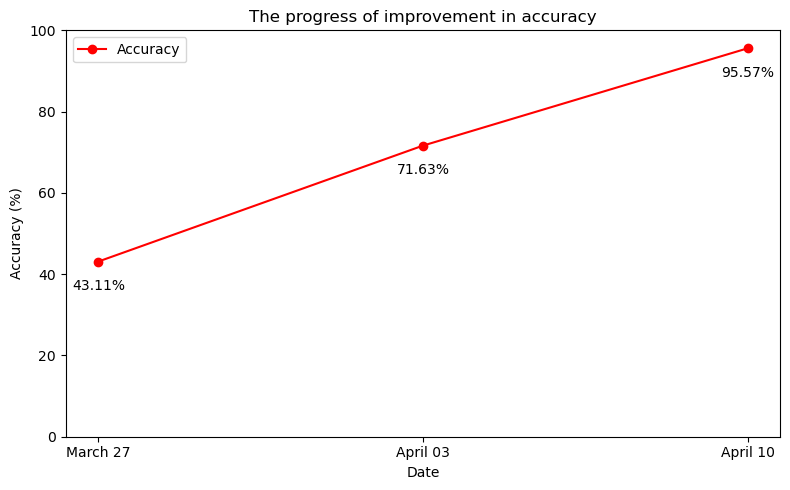

In [4]:
import pandas as pd 

# Dữ liệu độ chính xác (Accuracy)
acc_data = {
    "Date": ["March 27", "April 03", "April 10"],
    "Accuracy (%)": [43.11, 71.63, 95.57]
}

acc_df = pd.DataFrame(acc_data)

# Vẽ biểu đồ độ chính xác
plt.figure(figsize=(8, 5))
plt.plot(acc_df["Date"], acc_df["Accuracy (%)"], marker='o', color='red', label="Accuracy")

# # Thêm nhãn phần trăm lên các điểm
# for i, val in enumerate(acc_df["Accuracy (%)"]):
# 	plt.text(acc_df["Date"][i], val + 2, f"{val:.2f}%", ha='center', fontsize=10)
# Thêm nhãn dưới các điểm
for i, val in enumerate(acc_df["Accuracy (%)"]):
    plt.text(acc_df["Date"][i], val - 7, f"{val:.2f}%", ha='center', fontsize=10)

plt.title("The progress of improvement in accuracy")
plt.xlabel("Date")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(False)
plt.legend()
plt.tight_layout()

plt.show()

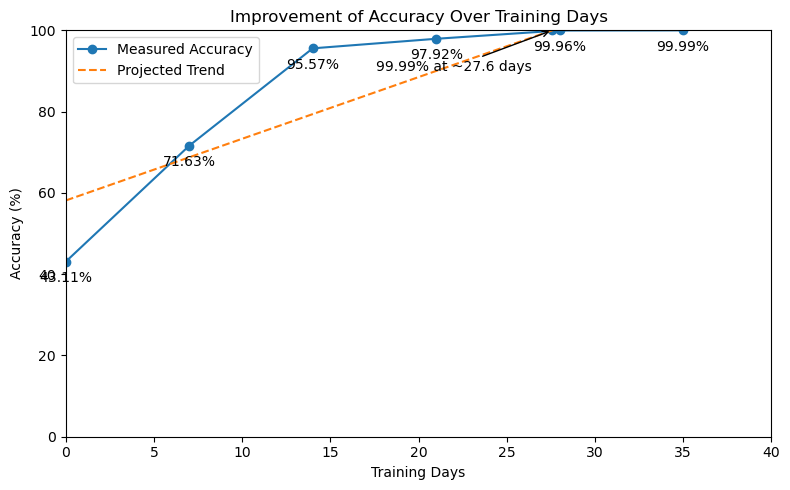

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu độ chính xác (Accuracy)
acc_data = {
    "Days": [0, 7, 14, 21, 28, 35],  # Số ngày kể từ lần đo đầu
    "Accuracy (%)": [43.11, 71.63, 95.57, 97.92, 99.96, 99.99]
}

acc_df = pd.DataFrame(acc_data)

# Tính hồi quy tuyến tính để dự đoán đến 99.99%
slope, intercept = np.polyfit(acc_df["Days"], acc_df["Accuracy (%)"], 1)
target_accuracy = 99.99
day_to_target = (target_accuracy - intercept) / slope

# Tạo mảng ngày cho đường dự đoán (0 đến max ngày dự đoán)
max_day = max(acc_df["Days"].max(), day_to_target)
days_pred = np.linspace(0, max_day, 100)
accuracy_pred = intercept + slope * days_pred

# Vẽ biểu đồ độ chính xác
plt.figure(figsize=(8, 5))
plt.plot(acc_df["Days"], acc_df["Accuracy (%)"], marker='o', label="Measured Accuracy")
plt.plot(days_pred, accuracy_pred, linestyle='--', label="Projected Trend")

# Thêm nhãn phần trăm lên các điểm đo
for _, row in acc_df.iterrows():
    plt.text(row["Days"], row["Accuracy (%)"] - 5, f"{row['Accuracy (%)']:.2f}%", ha='center', fontsize=10)

# Đánh dấu và annotation cho mốc 99.99%
plt.scatter(day_to_target, target_accuracy, marker='o')
plt.annotate(
    f"99.99% at ~{day_to_target:.1f} days",
    xy=(day_to_target, target_accuracy),
    xytext=(day_to_target - 10, target_accuracy - 10),
    arrowprops=dict(arrowstyle="->"),
    fontsize=10
)

plt.title("Improvement of Accuracy Over Training Days",)
plt.xlabel("Training Days")
plt.ylabel("Accuracy (%)")
plt.xlim(0, max_day + 5)
plt.ylim(0, 100)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()
